In [18]:
!pip install numpy==1.24.0 pandas scikit-learn torch torchvision matplotlib scipy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 52.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, r2_score)
from gensim.models import Word2Vec
from scipy.stats import mode




##Question 1

Part (a)

In [3]:
# Load Q11 data
data = pd.read_csv("PADL-Q11-train.csv")
X = data.drop(columns=["out"])
y = data["out"]

In [4]:
# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.9, random_state=123)

In [5]:
data.corr(method="pearson")["out"].drop("out")

,out
X1,-0.022519
X2,0.487261
X3,-0.406628
X4,0.138193
X5,0.331039


In [6]:
alphas = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
pipeline = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    RidgeCV(alphas=alphas, fit_intercept=True)
)

In [7]:
pipeline.fit(X_train, y_train)
r2 = r2_score(y_val, pipeline.predict(X_val))

In [8]:
print(f"Validation R²: {r2:.4f}")
print(f"Best alpha: {pipeline.named_steps['ridgecv'].alpha_}")

Validation R²: 1.0000
Best alpha: 0.001


In [9]:
final_model = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    Ridge(alpha=0.001)
)

In [10]:
final_model.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(alpha=0.001))])

In [ ]:
#Load test set
test_data = pd.read_csv("PADL-Q11-unseen.csv")
X_test = test_data.drop(columns=["out"])
y_test = test_data["out"]

y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {r2:.4f}")

Part (b)

In [13]:
# Load the training data
data = pd.read_csv("PADL-Q12-train.csv")
X = data.drop(columns=["out"])
y = data["out"]

In [14]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,300.0,500.451643,294.131746,5.061584,242.004526,510.331875,760.993690,990.505142
X2,300.0,4.981790,2.964880,0.108377,2.461287,4.775509,7.633798,9.997177
X3,300.0,25.922546,14.634331,0.231601,13.082446,27.031299,38.372979,49.896706
X4,300.0,24.969496,14.731770,0.287933,12.045990,24.901573,36.863381,49.970686


In [15]:
#5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Baseline: Linear Regression
baseline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])
lr_scores = cross_val_score(baseline, X, y, cv=kf, scoring="r2")
baseline_r2 = lr_scores.mean()
baseline.fit(X, y)
baseline_coefs = baseline.named_steps["lr"].coef_
baseline_coef_sum = np.sum(np.abs(baseline_coefs))

In [20]:
print("R²: {:.4f}".format(baseline_r2))
for i, c in enumerate(baseline_coefs):
    print("Feature {} coefficient: {:.4f}".format(i+1, c))
print("Sum of coefficients: {:.4f}".format(baseline_coef_sum))

R²: 0.9569
Feature 1 coefficient: 17.7428
Feature 2 coefficient: 8.9652
Feature 3 coefficient: 14.6941
Feature 4 coefficient: 1.1752
Sum of coefficients: 42.5774


The chosen regularisation method is the ElasticNet, which combines both L1 (Lasso) and L2 (Ridge) penalties.

In [25]:
# Regularisation: ElasticNet with CV over alpha
best_r2 = 0
best_alpha = None
best_coef_sum = float("inf")
alphas = np.logspace(-4, 2, 100)
best_model = None

for alpha in alphas:
    elastic_pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("elastic_net", ElasticNet(alpha=alpha, l1_ratio=0.9, random_state=42))
    ])
    elastic_scores = cross_val_score(elastic_pipe, X, y, cv=kf, scoring="r2")
    r2 = elastic_scores.mean()
    elastic_pipe.fit(X, y)
    coefs = elastic_pipe.named_steps["elastic_net"].coef_
    coef_sum = np.sum(np.abs(coefs))

    if r2 >= 0.9 * baseline_r2 and coef_sum < best_coef_sum:
        best_r2 = r2
        best_alpha = alpha
        best_model = elastic_pipe
        best_coefs = coefs
        best_coef_sum = coef_sum

final_model = best_model

In [26]:
print("R²: {:.4f}".format(best_r2))
print("Alpha: {:.4f}".format(best_alpha))
for i, c in enumerate(best_coefs):
    print("Feature {} coefficient: {:.4f}".format(i+1, c))
print("Sum of coefficients: {:.4f}".format(best_coef_sum))

R²: 0.8677
Alpha: 2.3101
Feature 1 coefficient: 12.7888
Feature 2 coefficient: 5.6027
Feature 3 coefficient: 10.3725
Feature 4 coefficient: 0.0000
Sum of coefficients: 28.7639


In [27]:
#Print the difference for each coefficient separately
for i, (base_c, reg_c) in enumerate(zip(baseline_coefs, best_coefs)):
    diff = base_c - reg_c
    print(f"Feature {i+1}: {diff:.4f}")

Feature 1: 4.9541
Feature 2: 3.3626
Feature 3: 4.3216
Feature 4: 1.1752


The ElasticNet model reduced the R² by 8.92%, while the coefficient magnitude was reduced by almost one-third(32.4%).

In [ ]:
#Load test set
test_data = pd.read_csv("PADL-Q12-unseen.csv")
X_test = test_data.drop(columns=["out"])
y_test = test_data["out"]

#Predict on test set
y_pred = final_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {r2:.4f}")

Part (c)

In [29]:
#Load the data
data = pd.read_csv('PADL-Q13-train.csv')
X = data.drop(columns=["out"])
y = data["out"]

Dataset contains 300 samples and 5 features. This sample-to-feature ratio satisfies rule of thumb (≥10 samples per feature) and reduces the risk of overfiting

In [30]:
X.shape

(300, 5)

To obtain more reliable assessment of performance cross-validation was used. It provides better estimation how well model generalises to unseen data and detect potential overfitting. Since the dataset is quite small, cross-validation effectively uses all 300 samples for both training and validation, rather than creating single train/val split. Using 5-folds, each iteration trains on 240 samples and validates on 60.

In [31]:
# Set up 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=62)

In [32]:
baseline_pipeline = Pipeline([
    ("lr", LinearRegression())
])

In [60]:
scores = cross_val_score(baseline_pipeline, X, y, cv=kf, scoring='r2')
print(f"5-fold cross-valitation R²: {scores.mean():.4f}")

5-fold cross-valitation R²: 0.9613


In [61]:
baseline_pipeline.fit(X, y)
print("Baseline Coefficients:", baseline_pipeline.named_steps["lr"].coef_)

Baseline Coefficients: [ 0.28561068  0.4141668   0.18665374 -0.30949337  0.0174621 ]


In [62]:
r2_score = baseline_pipeline.score(X, y)
print(f"Baseline R²: {r2_score:.4f}")

Baseline R²: 0.9659


The descriptive statistcs show that all features are continuous and have no missing values, but have very different and distributions.

In [57]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,300.0,-0.118030,1.653688,-5.208844,-1.204841,-0.110005,1.037322,4.760530
X2,300.0,0.183434,2.899741,-8.403038,-1.738648,0.065389,2.089494,9.397246
X3,300.0,0.392237,6.202502,-22.208877,-4.135754,0.139140,5.011779,22.905032
X4,300.0,0.181127,3.080314,-12.520381,-1.933037,-0.060989,2.291150,9.095478
X5,300.0,-0.296061,4.190317,-12.687886,-2.922096,-0.255402,2.503598,14.102427


Linear regression model already performs well on the raw data (R² = 96.31%). To further improve numerical stability and make sure that all features contribute equally, standard scaling was applied.

In [63]:
#Scaling the data
pipeline_scaled = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

In [64]:
scores = cross_val_score(pipeline_scaled, X, y, cv=kf, scoring='r2')
print(f"5-fold cross-valitation R² with Scaling: {scores.mean():.4f} ")

5-fold cross-valitation R² with Scaling: 0.9613 


In [65]:
pipeline_scaled.fit(X, y)
print("Scaled Coefficients:", pipeline_scaled.named_steps["lr"].coef_)

Scaled Coefficients: [ 0.47152317  1.19897318  1.15578906 -0.95174665  0.0730497 ]


<Axes: >

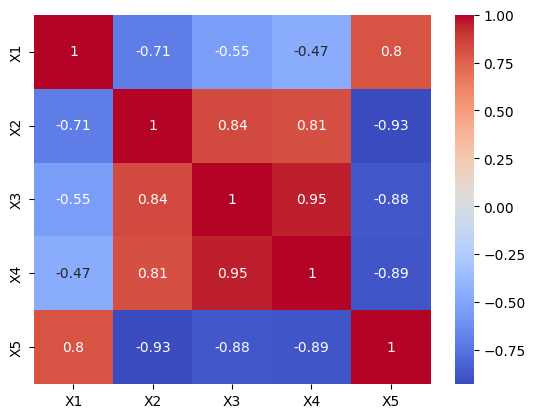

In [66]:
#Inspecting features for multicolinearity
sns.heatmap(X.corr(), annot=True, cmap="coolwarm")


Heatmap revealed that some of the features (X3 and X4, X2 and X4) have strong correlations. This is and indicator of multicolinearity, which can result into unstable and unreliable coefficient estimates. To address this issue, PCA is applied to transform features into uncorrelated components.

In [67]:
pipeline_scaled_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.99, random_state=42)),
    ("lr", LinearRegression())])

In [68]:
scores = cross_val_score(pipeline_scaled_pca, X, y, cv=kf, scoring='r2')
print(f"5-fold cross-valitation R² with Scaling and PCA: {scores.mean():.4f}")

5-fold cross-valitation R² with Scaling and PCA: 0.9616


PCA was applied with n_components=0.99, retaining 99% of variance to preserve the model performance.

In [69]:
pipeline_scaled_pca.fit(X, y)
print("Scaled and PCA Coefficients:", pipeline_scaled_pca.named_steps["lr"].coef_)

Scaled and PCA Coefficients: [-0.44648346  0.27848727  1.1149977   1.40977924]


In [ ]:
#Load test set
test_data = pd.read_csv("PADL-Q13-unseen.csv")
X_test = test_data.drop(columns=["out"])
y_test = test_data["out"]

y_pred = pipeline_scaled_pca.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R² on test set: {r2:.4f}") # raw (non-cross-validated) R² score

##Question 2


Part (a)

In [71]:
#Load data
data = pd.read_csv("PADL-Q2.csv")

X = data.drop(columns="y")
y = data["y"].values


In [72]:
n_clusters = data["y"].nunique()
print(f"Num of classes: {n_clusters}")

Num of classes: 4


In [73]:
#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [74]:
#Apply k-means++ clustering to original data
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=50, random_state=43)
kmeans_labels = kmeans.fit_predict(X_scaled)

In [75]:
#Apply PCA with the first two components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [77]:
def remap_labels(y_true, y_pred):
    result = np.zeros_like(y_pred)
    for i in np.unique(y_pred):
        mask = y_pred == i
        result[mask] = mode(y_true[mask], keepdims=False)[0]
    return result

In [78]:
mapped_labels = remap_labels(y, kmeans_labels)
acc = accuracy_score(y, mapped_labels)


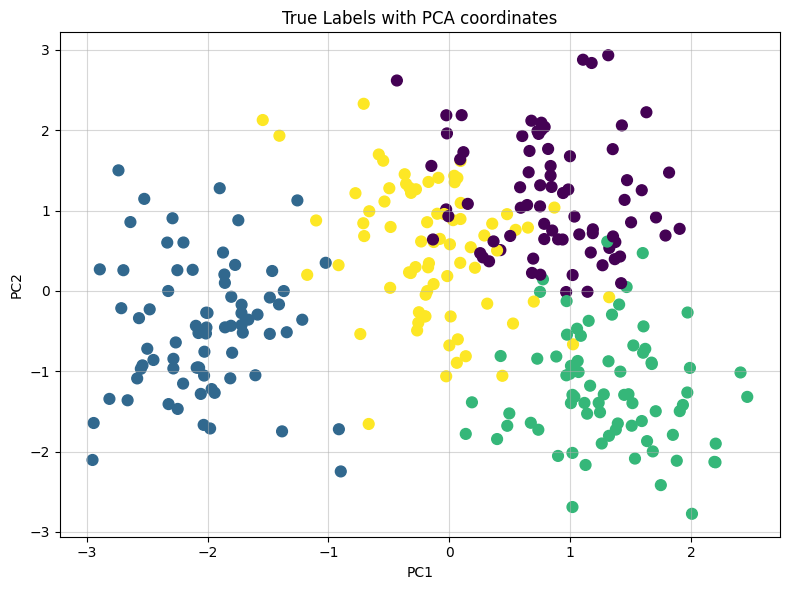

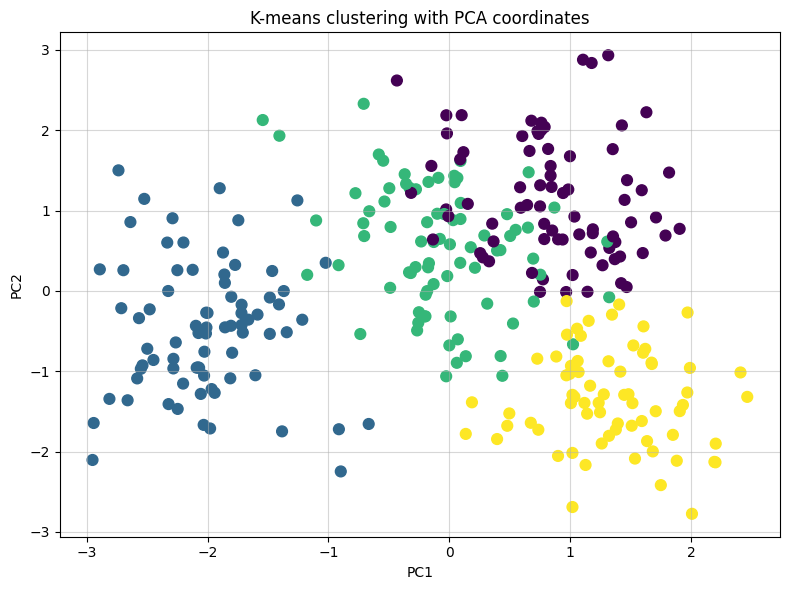

In [79]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("True Labels with PCA coordinates")
plt.grid(True,alpha=0.5)
plt.tight_layout()
plt.show()

#K-means clusters with original data with PCA coordinates
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=60)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-means clustering with PCA coordinates")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Part (b)

In [82]:
#KMeans on PCA-reduced data
kmeans_pca = KMeans(n_clusters=4, init='k-means++', n_init=50, random_state=42)
kmeans_labels_pca = kmeans_pca.fit_predict(X_pca)

In [83]:
mapped_labels_pca = remap_labels(y, kmeans_labels_pca)
acc_pca = accuracy_score(y, mapped_labels_pca)

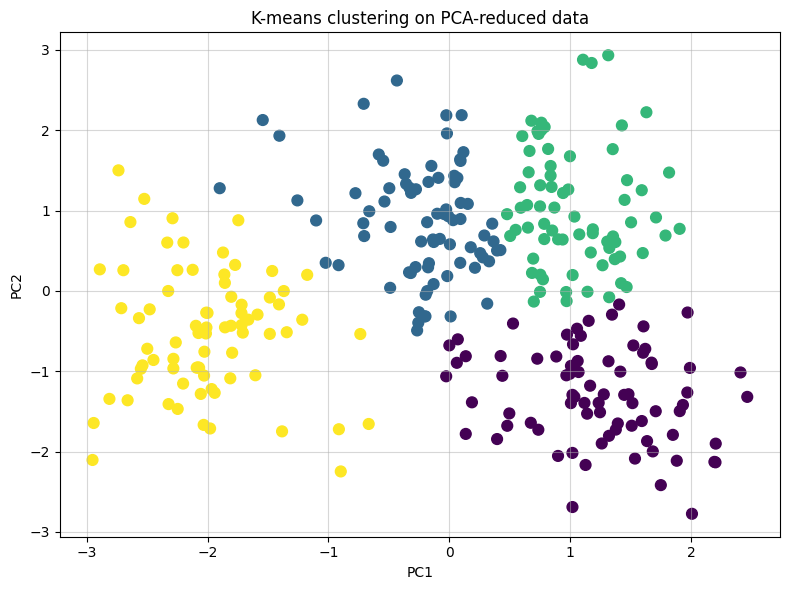

In [84]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels_pca, cmap='viridis', s=60)
plt.xlabel("PC1");
plt.ylabel("PC2")
plt.title("K-means clustering on PCA-reduced data")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

Part (c)

In [85]:
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance for PC1 and PC2 {explained_variance}")
print(f"Total variance explained {sum(explained_variance):.4f}")


Explained variance for PC1 and PC2 [0.37873093 0.2857641 ]
Total variance explained 0.6645


In [86]:
print(f"Clustering accuracy: {acc * 100:.2f}%")
print(f"Clustering accuracy (PCA-reduced): {acc_pca * 100:.2f}%")

Clustering accuracy: 95.33%
Clustering accuracy (PCA-reduced): 86.00%


In [87]:
#Print confusion matrices
cm = confusion_matrix(y, mapped_labels)
print("Confusion Matrix:")
print(cm)

cm_pca = confusion_matrix(y, mapped_labels_pca)
print("Confusion Matrix:")
print(cm_pca)


Confusion Matrix:
[[70  0  0  5]
 [ 0 75  0  0]
 [ 4  0 69  2]
 [ 2  1  0 72]]
Confusion Matrix:
[[59  0  0 16]
 [ 0 72  0  3]
 [ 6  0 69  0]
 [ 6  3  8 58]]


The relative loss of accuracy from using only two principal components is 9.33%, while the percentage of variance retained by PC1 and PC2 is 66.45%.
This shows that although over one-third of the data variance was discarded, the clustering quality only dropped by ~10%, meaning that PC1 and PC2 capture most of the useful clustering structure.

##Question 3


Part (a): Calculate cosine similarities between node 5 and nodes 21-30

In [ ]:
with open("PADL-Q3.txt", "r") as f:
    walks = [line.strip().split() for line in f.readlines()]

model = Word2Vec(sentences=walks,
                 vector_size=64,
                 window=3,
                 workers=4,
                 min_count=1,
                 sg=1, #1 - Skip-gram
                 negative=15, #number of negative samples
                 epochs=30,
                 alpha=0.025, #initial learning rate
                 min_alpha=0.0001 #final learning rate
)

print("Cosine similarities between:")
for i in range(21, 31):
    sim = model.wv.similarity("5", str(i))
    print(f"node 5 and {i}: {sim:.4f}")


Cosine similarities between:
node 5 and 21 - 0.1768
node 5 and 22 - 0.1627
node 5 and 23 - 0.2832
node 5 and 24 - 0.3219
node 5 and 25 - 0.2156
node 5 and 26 - 0.2411
node 5 and 27 - 0.2697
node 5 and 28 - 0.2455
node 5 and 29 - 0.2027
node 5 and 30 - 0.2842


In [ ]:
num_walks = len(walks)
avg_walk_length = sum(len(walk) for walk in walks) / num_walks
max_walk_length = max(len(walk) for walk in walks)

print(f"Num of walks: {num_walks}")
print(f"Average walk length: {avg_walk_length}")
print(f"Max walk length: {max_walk_length}")

Num of walks - 5000
Average walk length - 6.0
Max walk length - 6


Part (b): Creating distance matrix sorted by similarity

In [ ]:
def create_distance_matrix(model):

    node_ids = sorted([int(node) for node in model.wv.index_to_key])
    distance_matrix = []

    for node in node_ids:
        node_str = str(node)

        similarities = [(str(other), model.wv.similarity(node_str, str(other)))
                       for other in node_ids if other != node]

        sorted_nodes = sorted(similarities, key=lambda x: x[1], reverse=True)
        row = node_str + ' ' + ' '.join(n for n, _ in sorted_nodes)
        distance_matrix.append(row)

    return distance_matrix, node_ids

In [ ]:
distance_matrix, node_ids = create_distance_matrix(model)
output_file = "PADL-Q3-result.txt"

with open(output_file, 'w') as f:
    for row in distance_matrix:
        f.write(row + "\n")

In [ ]:
model.wv.most_similar("5", topn=36)

[('1', 0.8748427629470825),
 ('0', 0.874418318271637),
 ('9', 0.8290271162986755),
 ('6', 0.7461330890655518),
 ('10', 0.7441762685775757),
 ('11', 0.6938196420669556),
 ('7', 0.6542657017707825),
 ('14', 0.6419695019721985),
 ('2', 0.6395747065544128),
 ('3', 0.5698436498641968),
 ('15', 0.5201167464256287),
 ('19', 0.4299693703651428),
 ('12', 0.4112282991409302),
 ('8', 0.38661620020866394),
 ('4', 0.38187888264656067),
 ('18', 0.38183969259262085),
 ('35', 0.3499222993850708),
 ('16', 0.3462969660758972),
 ('31', 0.3225603699684143),
 ('24', 0.3218523859977722),
 ('13', 0.3103030323982239),
 ('30', 0.28419020771980286),
 ('23', 0.28323984146118164),
 ('20', 0.27852538228034973),
 ('32', 0.27678021788597107),
 ('27', 0.2696801424026489),
 ('17', 0.26763835549354553),
 ('28', 0.24553242325782776),
 ('26', 0.2411223202943802),
 ('33', 0.21819736063480377),
 ('34', 0.21590673923492432),
 ('25', 0.21555976569652557),
 ('29', 0.20267580449581146),
 ('21', 0.1767570823431015),
 ('22', 0.1

##Question 4


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
#Load and preprocess the data
data = pd.read_csv('body_measurements.csv')
data["Gender"] = data["Gender"].astype(int)
data = data.dropna()

In [ ]:
data.head()

,Gender,Chest Circumference (mm),Hip Circumference (mm),Height (mm),Weight (kg),Waist Circumference (mm)
0,0,904.0,1000.0,1723.0,60.9,724.0
1,0,859.0,1027.0,1694.0,63.2,690.0
2,0,1092.0,1135.0,1659.0,85.0,1014.0
3,1,1004.0,1091.0,2053.0,107.6,916.0
4,0,898.0,985.0,1608.0,61.3,755.0


Taking into account dataset characteristics (approximately 1800 samples with 5 imput features), the model should be balancing complexity while still capturing relevant non-linear realtionahips.

In [ ]:
#Reorder to match the test set
X = data[['Chest Circumference (mm)','Hip Circumference (mm)', 'Height (mm)',  'Weight (kg)', 'Gender']].values
y = data['Waist Circumference (mm)'].values.reshape(-1, 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

y_train_scaled = scaler_y.fit_transform(y_train)
y_val_scaled = scaler_y.transform(y_val)

X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_scaled)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val_scaled)

In [ ]:
#Get feature-wise means and stds to normalise inputs in predict_waist.py
X_means = scaler_X.mean_
X_stds = scaler_X.scale_
y_mean = scaler_y.mean_
y_std = scaler_y.scale_

print("feature means:", [float(f"{m:.9f}") for m in X_means])
print("feature stds:", [float(f"{s:.9f}") for s in X_stds])
print("target mean: ", float(f"{y_mean[0]:.9f}"))
print("target std;", float(f"{y_std[0]:.9f}"))

feature means: [982.398174157, 1023.808988764, 1721.676966292, 74.307303371, 0.481039326]
feature stds: [109.335458295, 84.948100666, 106.074476316, 16.190130075, 0.499640363]
target mean:  854.990168539
target std; 120.186412625


In [ ]:
corr_with_waist = data.corr(numeric_only=True)["Waist Circumference (mm)"].sort_values(ascending=False)
print("Correlations with Waist Circumference:")
print(corr_with_waist)

Correlations with Waist Circumference:
Waist Circumference (mm)    1.000000
Weight (kg)                 0.909266
Chest Circumference (mm)    0.892092
Hip Circumference (mm)      0.708293
Height (mm)                 0.366675
Gender                      0.301083
Name: Waist Circumference (mm), dtype: float64


The created network is a moderately deep feedforward neural network, designed for a regression task. It balances its capacity with generalisation ability given the dataset size of 1800 samples and small input dimensionality. The model has 2 hidden layers with 64 and 16 units respectively, followed by batch normalisation, ReLU activaton and dropout rate of 0.2.

In [ ]:
class PredictWaist(nn.Module):
    def __init__(self, input_size=5):
        super(PredictWaist, self).__init__()

        self.layer1 = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.layer2 = nn.Sequential(
            nn.Linear(64, 16),
            nn.BatchNorm1d(16),
            nn.ReLU(),
            nn.Dropout(0.2)
        )

        self.output_layer = nn.Linear(16, 1)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.output_layer(x)
        return x

Huber Loss was used for its robustenes to outliers and Adam optimizer was selected for faster and stable convergence. The model was kept compact to prevent overfitting, as more complex architechtures did not lead to any performance gains.

In [ ]:
model = PredictWaist()
criterion = nn.HuberLoss(delta=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [ ]:
num_epochs = 100
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1} Training loss -  {loss.item():.4f}, Validation loss - {val_loss.item():.4f}')


Epoch 10 Training loss -  0.0987, Validation loss - 0.1132
Epoch 20 Training loss -  0.0899, Validation loss - 0.0637
Epoch 30 Training loss -  0.0843, Validation loss - 0.0639
Epoch 40 Training loss -  0.0826, Validation loss - 0.0608
Epoch 50 Training loss -  0.0843, Validation loss - 0.0605
Epoch 60 Training loss -  0.0839, Validation loss - 0.0605
Epoch 70 Training loss -  0.0829, Validation loss - 0.0606
Epoch 80 Training loss -  0.0823, Validation loss - 0.0605
Epoch 90 Training loss -  0.0782, Validation loss - 0.0611
Epoch 100 Training loss -  0.0810, Validation loss - 0.0606


The validation loss decreased steadily, but plateau after epoch 50.

In [ ]:
model.eval()
with torch.no_grad():
    val_predictions_scaled = model(X_val_tensor)
    val_predictions = scaler_y.inverse_transform(val_predictions_scaled.numpy())

    abs_errors = np.abs(val_predictions - y_val)

    mae = np.mean(abs_errors)
    mape = np.mean(abs_errors / y_val) * 100
    print(f'Validation MAE: {mae:.2f} mm')
    print(f'Validation MAPE: {mape:.2f}%')

    top_10_errors = np.argsort(abs_errors.flatten())[::-1][:10]

    feature_names = ['Chest Circumference (mm)', 'Hip Circumference (mm)',
                     'Height (mm)', 'Weight (kg)', 'Gender']

    print("\nTop 10 Largest Errors:")
    for i in top_10_errors:
        actual = y_val[i][0]
        predicted = val_predictions[i][0]
        error = abs_errors[i][0]
        features = X_val[i]
        features_str = ', '.join(f"{name}={value}" for name, value in zip(feature_names, features))
        print(f"Index {i} | Error = {error:.2f} mm | Pred = {predicted:.2f} mm | True = {actual:.2f} mm")
        print(f"{features_str}")


Validation MAE: 32.49 mm
Validation MAPE: 3.86%

Top 10 Largest Errors:
Index 307 | Error = 162.60 mm | Pred = 1256.40 mm | True = 1419.00 mm
Chest Circumference (mm)=1301.0, Hip Circumference (mm)=1255.0, Height (mm)=1934.0, Weight (kg)=146.6, Gender=1.0
Index 321 | Error = 128.64 mm | Pred = 1281.36 mm | True = 1410.00 mm
Chest Circumference (mm)=1282.0, Hip Circumference (mm)=1525.0, Height (mm)=1794.0, Weight (kg)=142.7, Gender=1.0
Index 99 | Error = 127.36 mm | Pred = 809.64 mm | True = 937.00 mm
Chest Circumference (mm)=984.0, Hip Circumference (mm)=1021.0, Height (mm)=1626.0, Weight (kg)=66.4, Gender=0.0
Index 220 | Error = 127.15 mm | Pred = 832.85 mm | True = 960.00 mm
Chest Circumference (mm)=938.0, Hip Circumference (mm)=938.0, Height (mm)=1679.0, Weight (kg)=70.0, Gender=1.0
Index 51 | Error = 124.08 mm | Pred = 698.92 mm | True = 823.00 mm
Chest Circumference (mm)=819.0, Hip Circumference (mm)=896.0, Height (mm)=1664.0, Weight (kg)=51.8, Gender=0.0
Index 139 | Error = 118.


The error analysis shows that challenges primarily occur at the extremes of the measurement distribution or for individuals with unusual body proportions. To deal with this, deeper architectures, feature engineering and upsampling of these underrepresented samples were tested, but none resulted in noticeable performance improvements. The model's performance plateaued, suggesting that the input features may have inherent limitations in predicting waist measurements beyond the achieved threshold. Nevertheless, the model achieved a mean absolute error (MAE) of approximately 32.5 mm and a mean absolute percentage error (MAPE) of 3.86%, indicating that predictions were still relatively accurate within about 4% of the actual waist measurements.

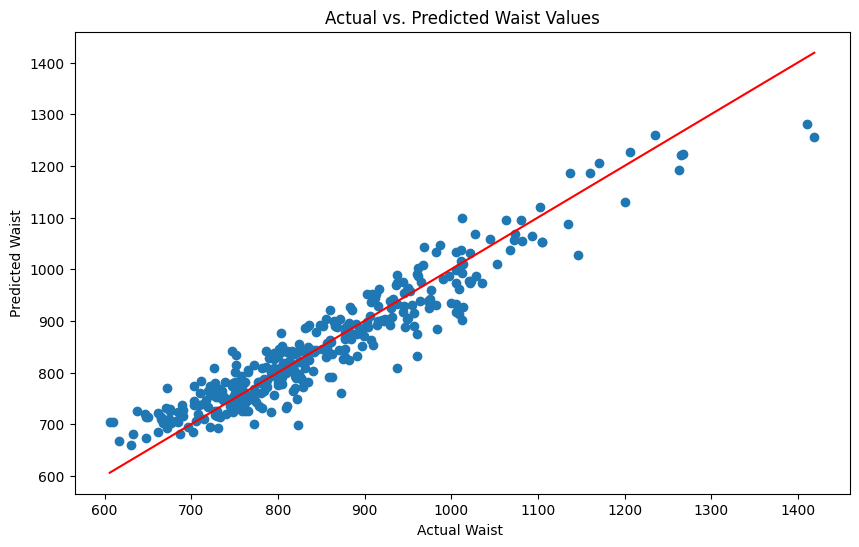

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, val_predictions)
plt.xlabel('Actual Waist ')
plt.ylabel('Predicted Waist')
plt.title('Actual vs. Predicted Waist Values')
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], 'r-')
plt.show()

In [ ]:
torch.save(model.state_dict(), "q4_model.pth")

##Question 5


In [ ]:
import random
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, Subset
from torchvision import transforms
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import zipfile
import shutil

In [ ]:
with zipfile.ZipFile("garment_images.zip", 'r') as zip_ref:
    zip_ref.extractall(".")

os.mkdir("garment_images")

for cls in ['0', '1', '2']:
    if os.path.exists(cls):
        shutil.move(cls, os.path.join("garment_images", cls))

In [ ]:
class GarmentDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []

        for class_name in ['0', '1', '2']:
            class_dir = os.path.join(root_dir, class_name)
            for img_name in os.listdir(class_dir):
              self.images.append(os.path.join(class_dir, img_name))
              self.labels.append(int(class_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

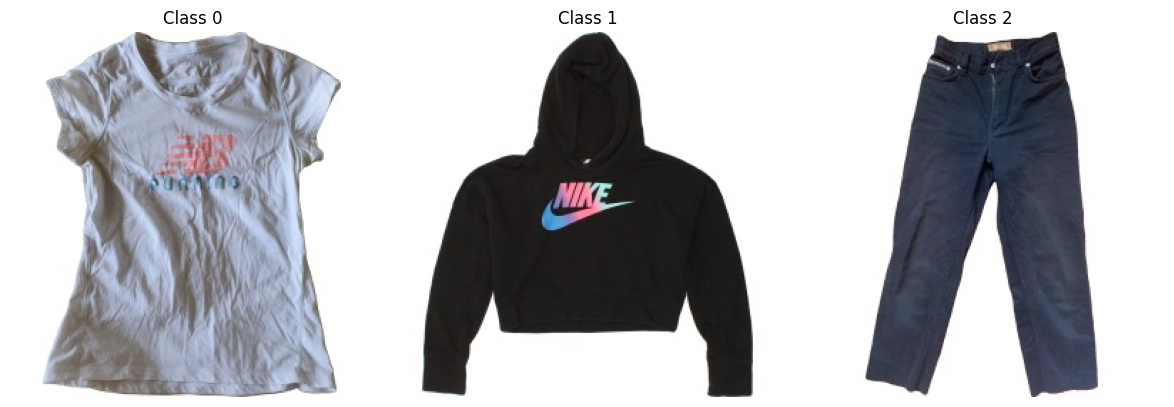

In [ ]:
root_dir = "garment_images"
class_names = ['0', '1', '2']

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i, class_name in enumerate(class_names):
    class_dir = os.path.join(root_dir, class_name)
    img_name = next(f for f in os.listdir(class_dir))
    img_path = os.path.join(class_dir, img_name)
    img = Image.open(img_path)
    axs[i].imshow(img)
    axs[i].set_title(f"Class {class_name}")
    axs[i].axis("off")
plt.tight_layout()
plt.show()


Only normalisation is applied. Data augmentation was also tested but it led to worse performance on valdiation set.

In [ ]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])])

In [ ]:
full_dataset = GarmentDataset(root_dir="garment_images", transform=data_transform)

In [ ]:
indices = list(range(len(full_dataset)))
random.shuffle(indices)

train_size = int(0.9 * len(full_dataset))
train_indices = indices[:train_size]
val_indices = indices[train_size:]
val_size = len(val_indices)


train_dataset = Subset(full_dataset, train_indices)
val_dataset = Subset(full_dataset, val_indices)

In [ ]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64,shuffle=True)
val_loader = DataLoader(dataset=val_dataset, batch_size=64, shuffle=False)

In [ ]:
print(f"Total dataset: {len(full_dataset)}")
print(f"Training set: {train_size}")
print(f"Validation set: {val_size}")
class_counts = [0, 0, 0]
for _, label in full_dataset:
    class_counts[label] += 1
print(f"T-shirts: {class_counts[0]}, Jumpers/Hoodies: {class_counts[1]}, Jeans: {class_counts[2]}")


Total dataset: 2627
Training set: 2364
Validation set: 263
T-shirts: 1025, Jumpers/Hoodies: 907, Jeans: 695


The dataset is a bit imbalanced with jeans being uderrepresented class. To address this class weights were applied inversely proportional to class frequencies in the loss function.

The convolutional neural network was inspired by VGG design. It uses stacked convolutional layers followed by batch normalisation, ReLU activation and max pooling for spatial downsampling. The first 7*7 convolution with stride 2 is inspired by ResNet to get a larger receptive field early in the network. This is followed by 4 convolutional blocks with increased channel depth from 64 to 512 to progressively extract more abstract and complex visual features.  These blocks were scaled to balance the parameter count and generalisation, remaining within memory limits.
The feature extracting blocks are followed by an adaptive average pooling layer, that ensures a fixed-size 512-dimensional vector. The fully connected part of the network reduces this vector to 256, applying ReLU activation and then to the 3 garment classes. A dropout rate of 0.5 is applied before both transistions to prevent overfitting.

In [ ]:
class GarmentCNN(nn.Module):
    def __init__(self, num_classes=3):
        super(GarmentCNN, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.classifier = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(inplace=True),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.classifier(x)
        return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = GarmentCNN(num_classes=3).to(device)
total_params = sum(p.numel() for p in model.parameters())
print(f"total parameters: {total_params:,}") # check the number of parameters to make sure it fits to the size limitations

total parameters: 4,791,939


In [ ]:
print(model)

GarmentCNN(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): ReLU(inplace=True)
    (14): Conv2

 Since the model is solving a mutli-class classification task, loss function should measure the divergence between predicted class probabilities and true class labels. For this task, CrossEntropyLoss was used with class weights to address the class imbalance that is present in the dataset. They are computed as the inverse of class frequency to give more importance to underrepresented classes. Adam optimizer with the initial learning rate of 0.0005 (reduced from default 0.001 for better stability) and weight decay 1e-4. A ReduceLROnPlateau scheduler to reduce learning rate if validation loss plateaued. Additionally, gradient clipping was added after backpropogation to prevent instability from large gradients.

In [ ]:
weights = [1/1025, 1/907, 1/695]
weights = torch.tensor(weights)
criterion = nn.CrossEntropyLoss(weight=weights.to(device))
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=1e-4)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)


In [ ]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc

In [ ]:
def validate(model, val_loader, criterion, n_aug=5):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_preds = []
    all_labels = []


    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            class_correct = [0] * 3
            class_total = [0] * 3
            for label, pred in zip(all_labels, all_preds):
                class_total[label] += 1
                if label == pred:
                    class_correct[label] += 1
            val_class_acc = [100 * c / t if t > 0 else 0 for c, t in zip(class_correct, class_total)]
            running_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total

    return epoch_loss, epoch_acc, all_preds, all_labels, val_class_acc


In [ ]:
num_epochs = 30
train_losses = []
train_accs = []
val_losses = []
val_accs = []
val_class_accs = [[], [], []]
best_val_acc = 0.0
best_epoch = 0

for epoch in range(num_epochs):
    train_loss, train_acc = train_epoch(model, train_loader, criterion, optimizer)
    train_losses.append(train_loss)
    train_accs.append(train_acc)

    val_loss, val_acc, all_preds, all_labels, val_class_acc = validate(model, val_loader, criterion)
    val_losses.append(val_loss)
    val_accs.append(val_acc)

    for i in range(3):
        val_class_accs[i].append(val_class_acc[i])
    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
    print(f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")
    print(f"T-shirt Acc: {val_class_acc[0]:.2f}%, Jumper/Hoody Acc: {val_class_acc[1]:.2f}%, Jeans Acc: {val_class_acc[2]:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = epoch
        torch.save(model.state_dict(), "q5_model.pth")



Epoch 1/30
Train Loss: 0.5823, Train Acc: 73.52%
Val Loss: 3.5928, Val Acc: 37.26%
T-shirt Acc: 1.05%, Jumper/Hoody Acc: 100.00%, Jeans Acc: 0.00%
Epoch 2/30
Train Loss: 0.2934, Train Acc: 88.79%
Val Loss: 2.9991, Val Acc: 49.81%
T-shirt Acc: 100.00%, Jumper/Hoody Acc: 21.28%, Jeans Acc: 19.40%
Epoch 3/30
Train Loss: 0.2456, Train Acc: 91.24%
Val Loss: 0.2234, Val Acc: 89.35%
T-shirt Acc: 92.63%, Jumper/Hoody Acc: 79.79%, Jeans Acc: 97.01%
Epoch 4/30
Train Loss: 0.1876, Train Acc: 93.10%
Val Loss: 0.4103, Val Acc: 89.73%
T-shirt Acc: 91.58%, Jumper/Hoody Acc: 97.87%, Jeans Acc: 77.61%
Epoch 5/30
Train Loss: 0.1937, Train Acc: 93.06%
Val Loss: 0.4699, Val Acc: 82.13%
T-shirt Acc: 58.95%, Jumper/Hoody Acc: 100.00%, Jeans Acc: 89.55%
Epoch 6/30
Train Loss: 0.1746, Train Acc: 93.06%
Val Loss: 0.3399, Val Acc: 87.07%
T-shirt Acc: 97.89%, Jumper/Hoody Acc: 65.96%, Jeans Acc: 100.00%
Epoch 7/30
Train Loss: 0.1617, Train Acc: 93.95%
Val Loss: 0.1711, Val Acc: 92.02%
T-shirt Acc: 80.00%, Jumper

In [ ]:
model.load_state_dict(torch.load("q5_model.pth"))
print(f"Loaded best model from epoch {best_epoch+1} with validation accuracy: {best_val_acc:.2f}%")

Loaded best model from epoch 23 with validation accuracy: 96.96%


Even though jeans were the most underepreseted class, they were still the easiest to classify with striking accuracy of 100%. Jumprers/Hoodies had the most variability probably due to their visual similarity with T-shirts, bit the model stll achieved acuraccy of around 94% for them as well.

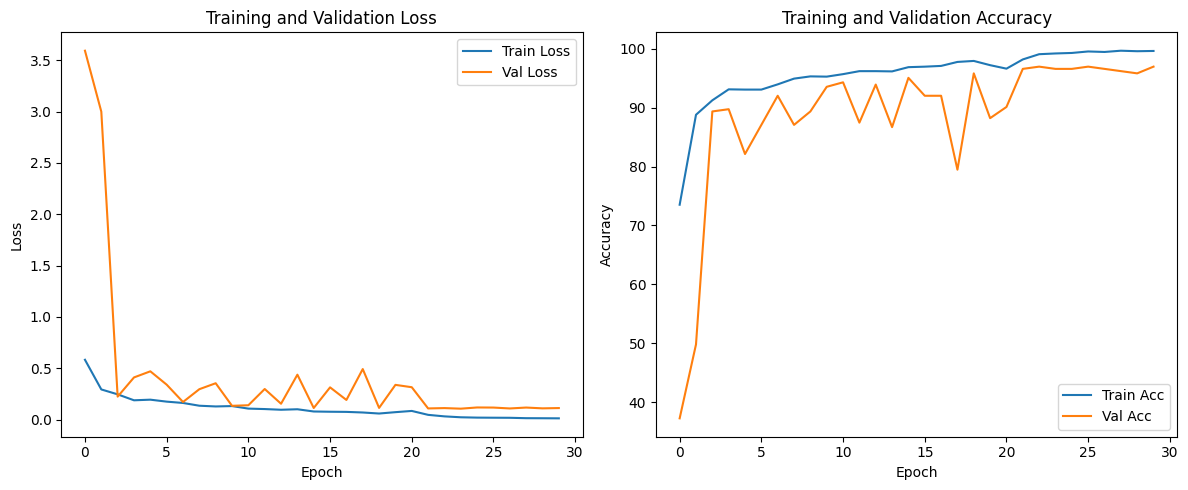

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train Acc')
plt.plot(val_accs, label='Val Acc')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

While training metrics remained stable throughout the entire training process, validation loss and accuracy had some fluctuations. This is due to the small validation set size of only 263 samples, which makes the metrics more sensitive to individual batch variations.

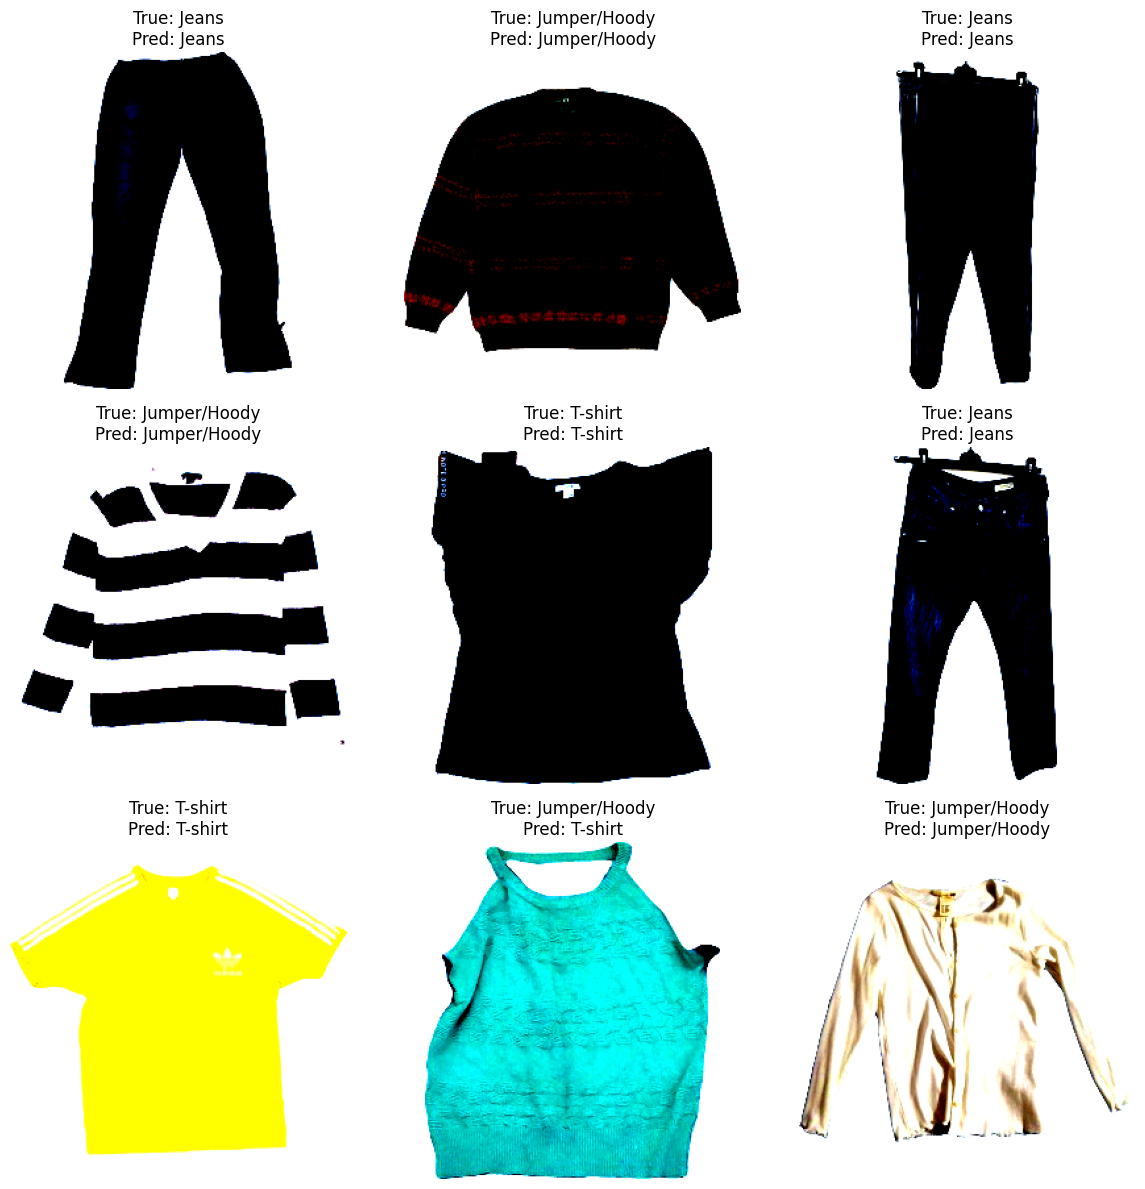

In [ ]:
model.eval()

images, labels = next(iter(val_loader))
images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    preds = outputs.argmax(dim=1)

class_names = ['T-shirt', 'Jumper/Hoody', 'Jeans']
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    true_label = class_names[labels[i].item()]
    pred_label = class_names[preds[i].item()]
    plt.title(f"True: {true_label}\nPred: {pred_label}", fontsize=12)
    plt.axis("off")
    img = images[i].cpu().permute(1, 2, 0).clamp(0, 1).numpy()
    plt.imshow(img)

plt.tight_layout()
plt.show()

From the visualisation only one sample was misclassified where the garment appears sleeveless and visually reminds T-shirt. All other samples were classified correctly.

#Question 6


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import zipfile
import random
from skimage.metrics import structural_similarity as ssim

In [2]:
with zipfile.ZipFile("face_images.zip", 'r') as zip_ref:
  zip_ref.extractall(".")

os.makedirs("face_images", exist_ok=True)
for filename in os.listdir("."):
  if filename.endswith(".jpg"):
        os.rename(filename, os.path.join("face_images", filename))

In [3]:
class FaceImages(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        for img_name in os.listdir(root_dir):
            self.images.append(os.path.join(root_dir, img_name))

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)

        return image


In [4]:
transform = transforms.Compose([transforms.ToTensor()])
dataset = FaceImages(root_dir="face_images", transform=transform)

In [5]:
train_size = int(0.9 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])

In [6]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

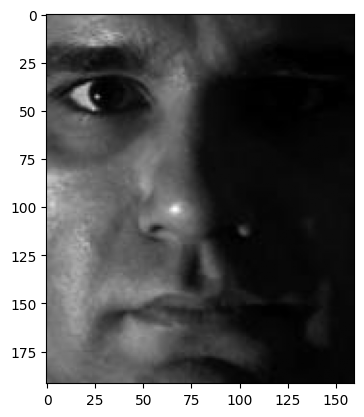

In [7]:
img = dataset[678]
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

The development of the model was an iterative process that began with a smaller model, carefully balancing performance, depth and model size. The final design is a convolutional autoencoder also inspired by VGG style, using convolutional blocks for feature extraction and reconstruction.

 The encoder has five convolution layers, increasing feature maps from 32 to 384 to capture complex representations. The layers were kept from 32 -> 48 -> 96 -> 192 -> 384 rather than 32 -> 64 -> 128 -> 256 -> 512, as the it would exceed memory limits. The strided convolutions reduced the input dimentionfrom 192×60 to 6×5. This results in a flattened vector of 11520 units to balance compactness and expressiveness. After that it was reduced to 32D latent representation vector. The decoder mirrors the encoder's structure with transposed convolution to reconstruct the original image. LeakyReLU activations were used in the encoder,while in the decoder standard ReLU was used. A Sigmoid activation is applied to ensure that intensity values are within (0,1) range. Batch normalisation was applied after each convolutional layer to stabilise learning.

In [8]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=32):
        super().__init__()

        #Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.LeakyReLU(),
            nn.Conv2d(32, 48, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(48),
            nn.LeakyReLU(),
            nn.Conv2d(48, 96, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(96),
            nn.LeakyReLU(),
            nn.Conv2d(96, 192, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(192),
            nn.LeakyReLU(),
            nn.Conv2d(192, 384, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(384),
            nn.LeakyReLU()
        )
        self.flatten = nn.Flatten()
        self.fc_enc = nn.Linear(384 * 6 * 5, latent_dim)

        #Decoder
        self.fc_dec = nn.Sequential(
            nn.Linear(latent_dim, 384 * 6 * 5),
            nn.ReLU(0.1)
        )
        self.decoder = nn.Sequential(
            nn.Unflatten(1, (384, 6, 5)),
            nn.ConvTranspose2d(384, 192, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(192),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(192, 96, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(96, 48, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(48),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(48, 24, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(24),
            nn.ReLU(inplace=True),
            nn.ConvTranspose2d(24, 12, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(12),
            nn.ReLU(inplace=True),
            nn.Conv2d(12, 1, kernel_size=3, padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.flatten(x)
        z = self.fc_enc(x)
        x = self.fc_dec(z)
        x = self.decoder(x)
        return x


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = Autoencoder(latent_dim=32).to(device)
print(model)

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Conv2d(32, 48, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (4): BatchNorm2d(48, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(48, 96, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (7): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): LeakyReLU(negative_slope=0.01)
    (9): Conv2d(96, 192, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (10): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Conv2d(192, 384, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (13): BatchNorm2d(384, eps=1e-05, momentum=0.1, affine=True, 

In [10]:
total_param = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Total num of parameters: {total_param:,}") # check the number of parameters to make sure it fits to the size limitations

Total num of parameters: 3,897,017


The model was trained using the MSE loss and Adam optimizer. The initial learning rate reduced from 1e-3 to 5e-4  for better stability. The initially chosen scheduler ReduceLROnPlateau was replaced with a CosineAnnealingLR for a smoother learning rate decay, contributing to the final SSIM gains in the later stages of training.

In [11]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4, weight_decay=1e-5 )
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=150)

In [12]:
best_val_ssim = 0.0
train_losses = []
val_losses = []
val_ssims = []

for epoch in range(150):
    model.train()
    train_loss = 0.0

    for batch_idx, images in enumerate(train_loader):
        images = images.to(device)

        reconstructed = model(images)
        loss = criterion(reconstructed, images)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    model.eval()
    val_loss = 0.0
    val_ssim = 0.0
    val_images = 0

    with torch.no_grad():
        for images in val_loader:
            images = images.to(device)
            reconstructed = model(images)
            loss = criterion(reconstructed, images)
            val_loss += loss.item()

            batch_ssim = 0.0
            for i in range(images.size(0)):
                img1 = images[i].squeeze().cpu().numpy()
                img2 = reconstructed[i].squeeze().cpu().numpy()
                batch_ssim += ssim(img1, img2, data_range=1.0)

            val_ssim += batch_ssim
            val_images += images.size(0)

    avg_val_loss = val_loss / len(val_loader)
    avg_val_ssim = val_ssim / val_images
    val_losses.append(avg_val_loss)
    val_ssims.append(avg_val_ssim)

    print(f"Epoch {epoch+1}/150, Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, Val SSIM: {avg_val_ssim:.4f}")

    scheduler.step()

    if avg_val_ssim > best_val_ssim:
        best_val_ssim = avg_val_ssim
        best_epoch = epoch + 1
        torch.save(model.state_dict(),'q6_model.pth')

print(f"Model saved from epoch {best_epoch} with val SSIM: {best_val_ssim:.4f}")


Epoch 1/150, Train Loss: 0.0374, Val Loss: 0.0173, Val SSIM: 0.4345
Epoch 2/150, Train Loss: 0.0149, Val Loss: 0.0134, Val SSIM: 0.4891
Epoch 3/150, Train Loss: 0.0112, Val Loss: 0.0097, Val SSIM: 0.5976
Epoch 4/150, Train Loss: 0.0097, Val Loss: 0.0081, Val SSIM: 0.5686
Epoch 5/150, Train Loss: 0.0084, Val Loss: 0.0077, Val SSIM: 0.6174
Epoch 6/150, Train Loss: 0.0070, Val Loss: 0.0063, Val SSIM: 0.6349
Epoch 7/150, Train Loss: 0.0061, Val Loss: 0.0062, Val SSIM: 0.6733
Epoch 8/150, Train Loss: 0.0057, Val Loss: 0.0051, Val SSIM: 0.6843
Epoch 9/150, Train Loss: 0.0053, Val Loss: 0.0060, Val SSIM: 0.6444
Epoch 10/150, Train Loss: 0.0050, Val Loss: 0.0047, Val SSIM: 0.7093
Epoch 11/150, Train Loss: 0.0046, Val Loss: 0.0059, Val SSIM: 0.6999
Epoch 12/150, Train Loss: 0.0045, Val Loss: 0.0047, Val SSIM: 0.7028
Epoch 13/150, Train Loss: 0.0045, Val Loss: 0.0046, Val SSIM: 0.6826
Epoch 14/150, Train Loss: 0.0041, Val Loss: 0.0037, Val SSIM: 0.7313
Epoch 15/150, Train Loss: 0.0041, Val Loss:

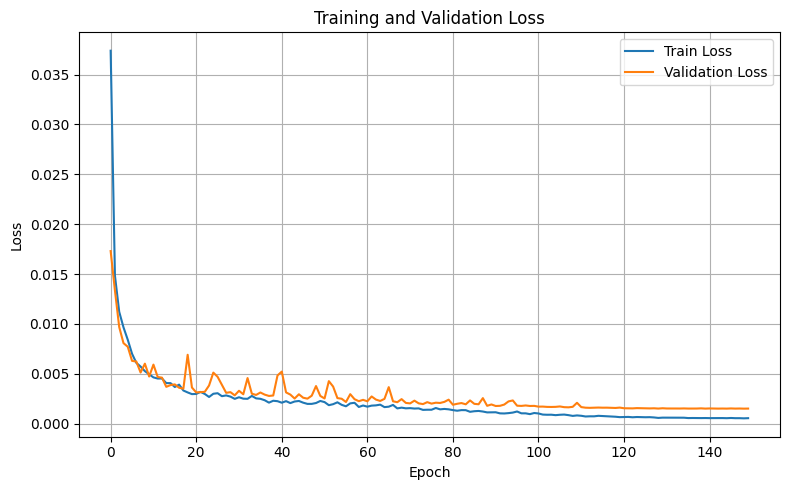

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Judging by the consistent decrease in both training and validation losses, no overfitting occurred. The reduced learning rate of 5e-4  allowed more stable training, reducing initial fluctuations. The Adam optimizer contributed to improvements early on, while CosineAnnealingLR facilitated further gains in the later stages of training, preventing premature convergence. L2 regularisation (weight decay of 1e-5) helped to keep both curves aligned, indicating the model generalises well. The main gains occurred around 50 epochs, while training for the full 150 epochs allowed for additional incremental gains.

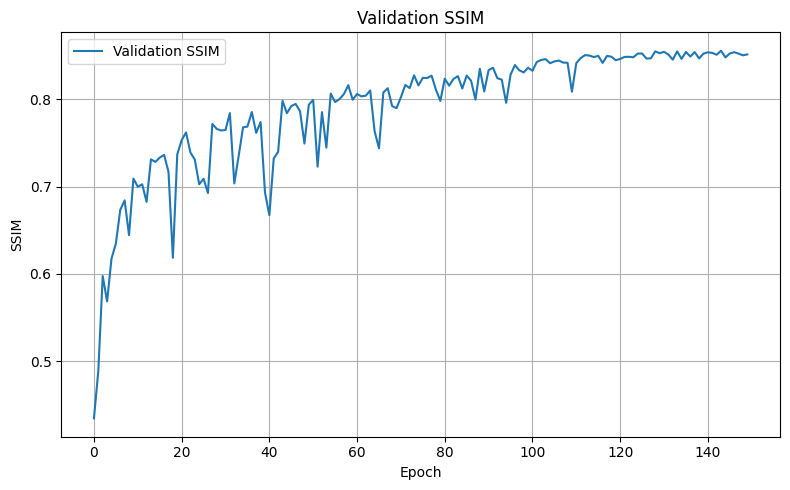

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(val_ssims, label='Validation SSIM')
plt.xlabel('Epoch')
plt.ylabel('SSIM')
plt.title('Validation SSIM')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Unlike the losses, SSIM experiecned larger fluctuations, but showed consistent upward trend. The general trend stabilised after epoch 70, followed by smoother and consistent improvements.

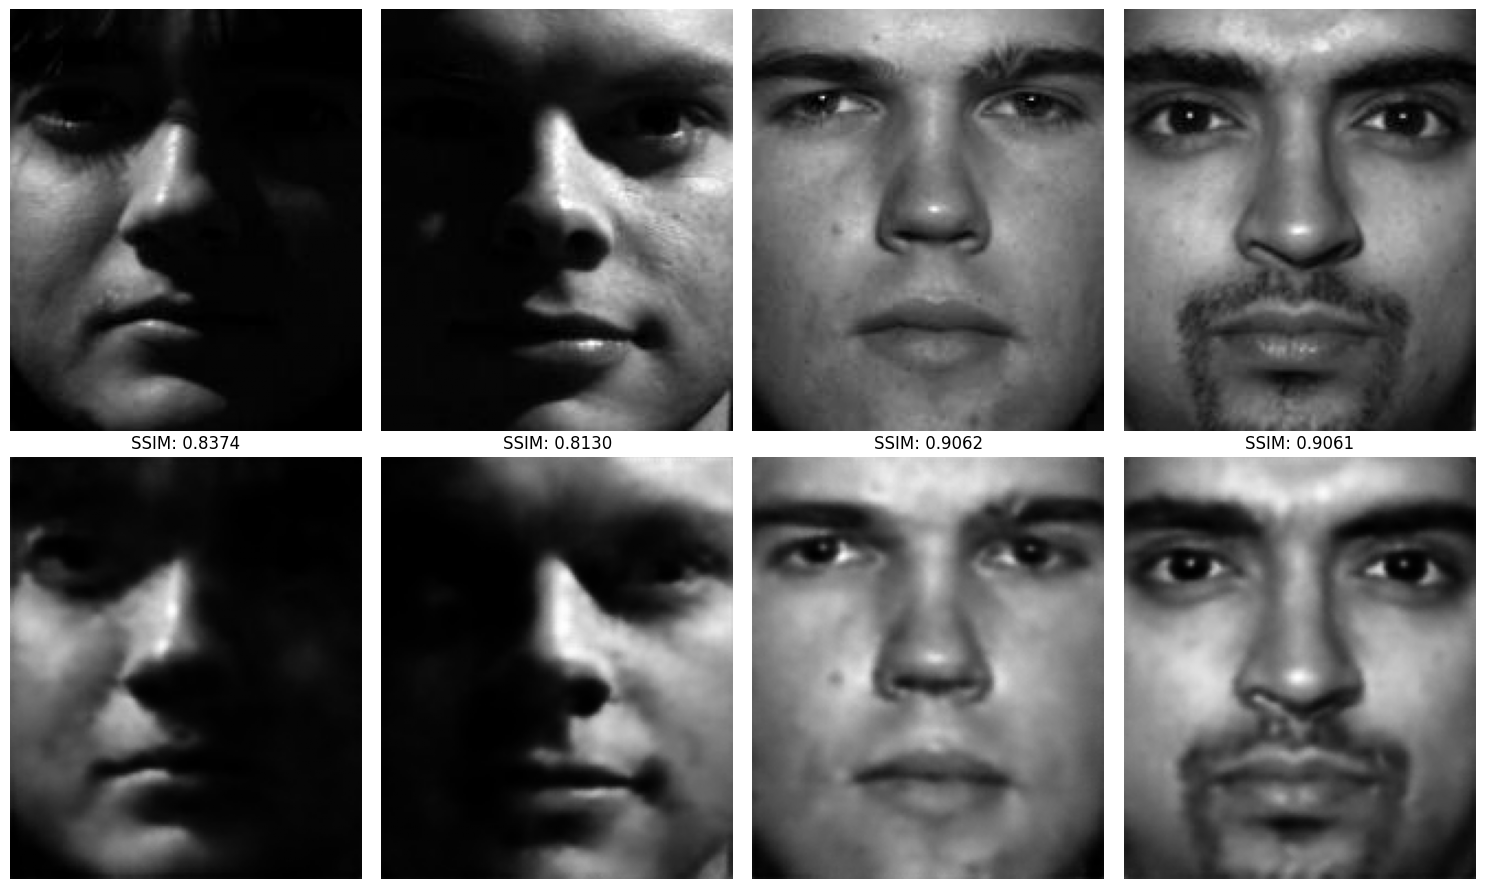

In [16]:
images = next(iter(val_loader))
images = images[-4:].to(device)

with torch.no_grad():
    reconstructions = model(images)

fig, axes = plt.subplots(2, 4, figsize=(15, 9))
for i in range(4):
    orig = images[i].squeeze().cpu().numpy()
    recon = reconstructions[i].squeeze().cpu().numpy()
    score = ssim(orig, recon, data_range=1.0)

    axes[0, i].imshow(orig, cmap='gray')
    axes[0, i].axis('off')

    axes[1, i].imshow(recon, cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title(f"SSIM: {score:.4f}")

plt.tight_layout()
plt.show()

After visualisation of some reconstructions, model accurately reconstructed the main facial features, although some blurriness was present. SSIM scores are slightly lower for samples with poorer light conditions, indicating that model may underperform on dark regions.